In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter # to plot word count graph for EDA later
import nltk # for NLP tasks
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords # for pre-processing of text to remove common words
stopwords = stopwords.words('english')
from nltk.stem import WordNetLemmatizer # for pre-processing of text (lemmatize text, i.e. converting a word to its base form)
from sklearn.feature_extraction.text import TfidfVectorizer # for pre-processing of text
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC # chosen model to train
from sklearn import metrics # for measuring accuracy
import pickle # to store model 

import re
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
df_raw = pd.read_csv("NewsCategorizer.csv")
df_raw.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [59]:
df = df_raw[['category', 'short_description']]
df.head()

,category,short_description
0,WELLNESS,Resting is part of training. I've confirmed wh...
1,WELLNESS,Think of talking to yourself as a tool to coac...
2,WELLNESS,The clock is ticking for the United States to ...
3,WELLNESS,"If you want to be busy, keep trying to be perf..."
4,WELLNESS,"First, the bad news: Soda bread, corned beef a..."


In [60]:
categories = df['category'].unique()
print(categories)
df['category'].value_counts()

['WELLNESS' 'POLITICS' 'ENTERTAINMENT' 'TRAVEL' 'STYLE & BEAUTY'
 'PARENTING' 'FOOD & DRINK' 'WORLD NEWS' 'BUSINESS' 'SPORTS']


WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: category, dtype: int64

In [61]:
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords)) # stopwords variable was defined at the import section earlier
df['short_description'] = df['short_description'].str.lower().replace([r'\|', RE_stopwords], ['',''], regex=True) # remove stopwords
df['short_description'] = df['short_description'].str.replace(r'[^\w\s]+', '').replace('_', '') # remove punctuation
df['short_description'] = df['short_description'].str.replace('_', '') # remove underscores
df['short_description'] = df['short_description'].str.replace(r"[0-9]+", "", regex=True)  # remove digits
df['short_description'] = df['short_description'].str.replace(r'\b[a-zA-Z]\b', '', regex=True) 
sentence = df['short_description']

In [62]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [63]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['short_description'] = df['short_description'].apply(lemmatize_text).str.join(" ")

In [64]:
df[df['category']=='WELLNESS']['short_description'].values[:5]

array(['resting part training confirmed sort already knew built running streak built hard workout three five day week lot cross training physical therapy foam rolling also confirmed stubborn',
       'think talking tool coach challenge narrate experience case treat respect may find enjoy company',
       'clock ticking united state find cure team working study dr francisco lopera',
       'want busy keep trying perfect want happy focus making difference',
       'first bad news soda bread corned beef beer highly nutritious meal make luck irish would'],
      dtype=object)

In [65]:
df[df['category']=='TRAVEL']['short_description'].values[:5]

array(['discussion mccandless life either reading book watching film hearing passing information',
       'woke condition turn poke head see could travel horizon contrast thick whiteout slight shadow tent could see blizzard flying past u',
       'traveler going love one',
       'currently live los angeles way new york city two large selffocused metropolitan megacities london london favorite city world far',
       'walked across israel bicycled across burma piloted fishing boat laotian mekong driven land rover across america prove point traveling light trekked around world six week luggage bag kind'],
      dtype=object)

In [68]:
print(categories)

['WELLNESS' 'POLITICS' 'ENTERTAINMENT' 'TRAVEL' 'STYLE & BEAUTY'
 'PARENTING' 'FOOD & DRINK' 'WORLD NEWS' 'BUSINESS' 'SPORTS']


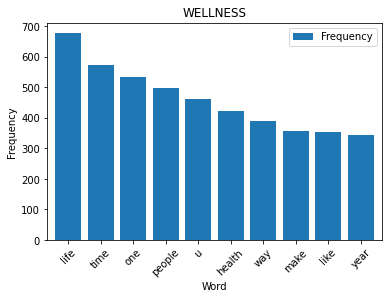

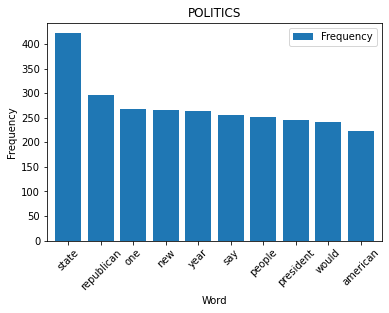

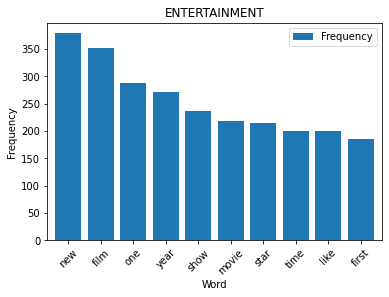

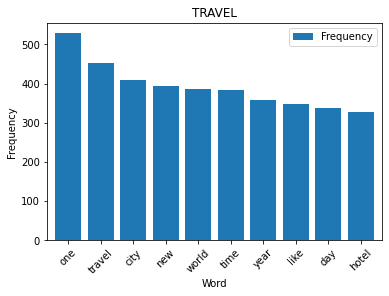

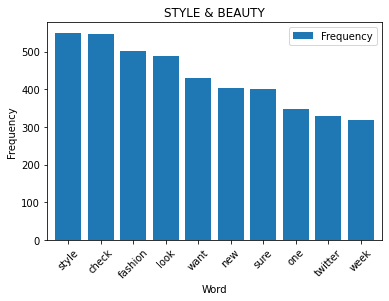

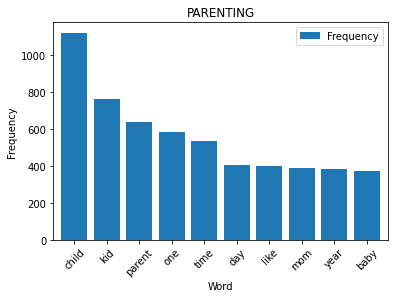

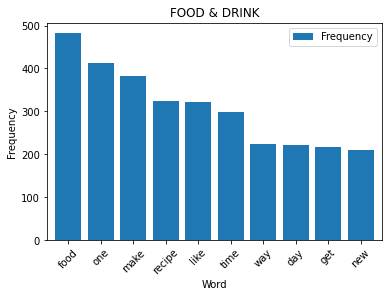

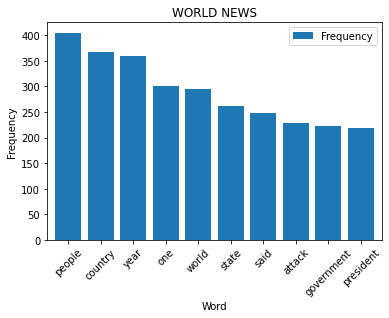

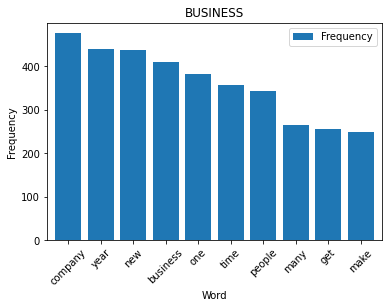

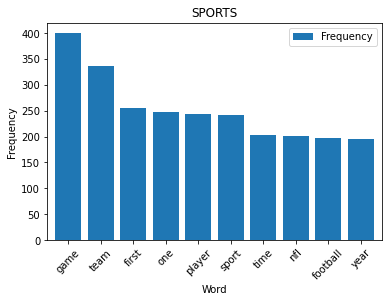

In [66]:

top_N = 10

for category in categories:
    words = df[df['category']==category]['short_description'].str.cat(sep=' ').split()

    # generate DF out of Counter
    rslt = pd.DataFrame(Counter(words).most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    # plot
    rslt.plot.bar(rot=45, width=0.8)
    plt.ylabel('Frequency')
    plt.title(category)
    plt.show()

In [69]:
X = df["short_description"]
y = df["category"]
print(X.head())
print(y.head())

0    resting part training confirmed sort already k...
1    think talking tool coach challenge narrate exp...
2    clock ticking united state find cure team work...
3    want busy keep trying perfect want happy focus...
4    first bad news soda bread corned beef beer hig...
Name: short_description, dtype: object
0    WELLNESS
1    WELLNESS
2    WELLNESS
3    WELLNESS
4    WELLNESS
Name: category, dtype: object


In [71]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob


In [72]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [73]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [74]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,resting part training confirmed sort already k...,0.101667,0.536905
1,think talking tool coach challenge narrate exp...,0.400000,0.500000
2,clock ticking united state find cure team work...,0.000000,0.000000
3,want busy keep trying perfect want happy focus...,0.633333,0.766667
4,first bad news soda bread corned beef beer hig...,-0.072500,0.385000


In [75]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      50000 non-null  object 
 1   Polarity      50000 non-null  float64
 2   Subjectivity  50000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

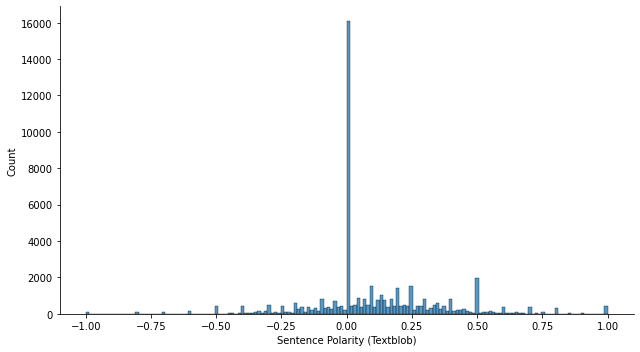

In [76]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

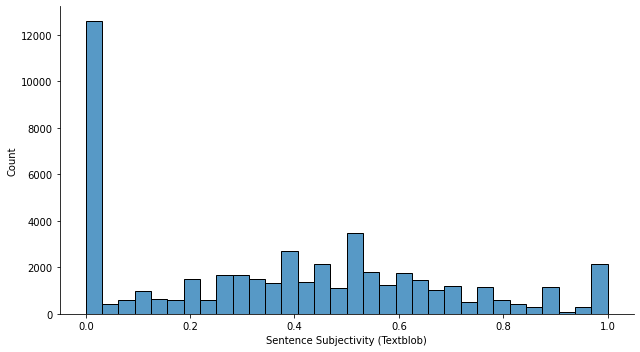

In [77]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [80]:
pip install pattern


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 17.9 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 81 kB 6.0 MB/s 
     |████████████████████████████████| 5.6 MB 6.1 MB/s 
     |████████████████████████████████| 5.6 MB 13.1 MB/s 
     |████████████████████████████████| 419 kB 40.9 MB/s 
     |████████████████████████████████| 104 kB 15.6 MB/s 
     |████████████████████████████████| 4.0 MB 29.5 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=b358c2236fa0c3ac0a8c96f4569cf3dfa7bb9fbc181e037e7a8845529cbe22ba
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp37-cp37m-linux_x86_64.whl size=99986 sha256=9444172dc83b650bf963364f847a2f6aa798ef2f240346f4345692d24e863000
  Stored i

In [81]:
from pattern.en import sentiment

In [82]:
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])

In [84]:
pattern_sentiment[1]


['think talking tool coach challenge narrate experience case treat respect may find enjoy company',
 0.4,
 0.5]

In [85]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [86]:
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,resting part training confirmed sort already k...,0.101667,0.536905
1,think talking tool coach challenge narrate exp...,0.400000,0.500000
2,clock ticking united state find cure team work...,0.000000,0.000000
3,want busy keep trying perfect want happy focus...,0.633333,0.766667
4,first bad news soda bread corned beef beer hig...,-0.072500,0.385000


In [87]:
df_pattern.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      50000 non-null  object 
 1   Polarity      50000 non-null  float64
 2   Subjectivity  50000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

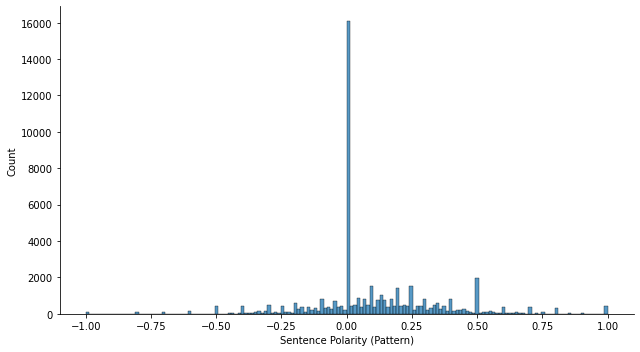

In [88]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

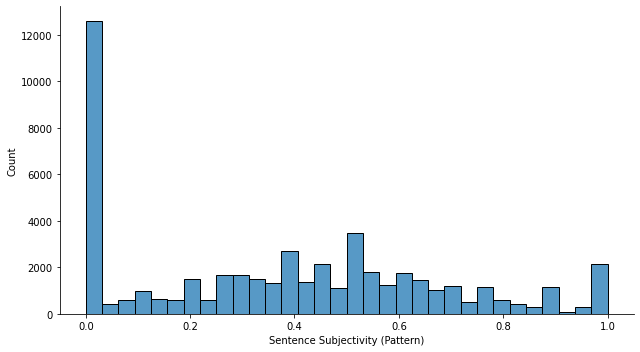

In [89]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

In [90]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words)

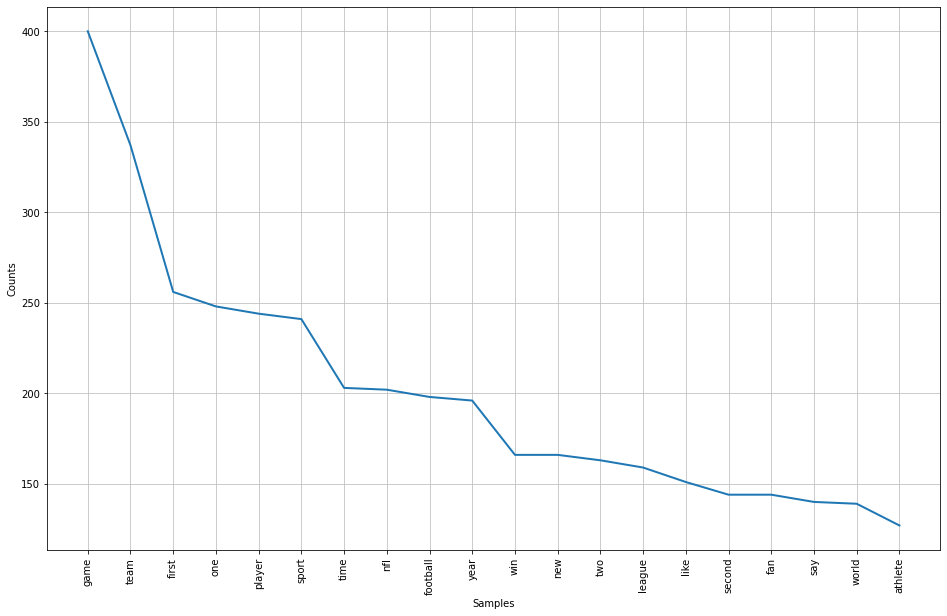

In [91]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)


In [94]:
#converting into string
res=' '.join([i for i in words if not i.isdigit()])

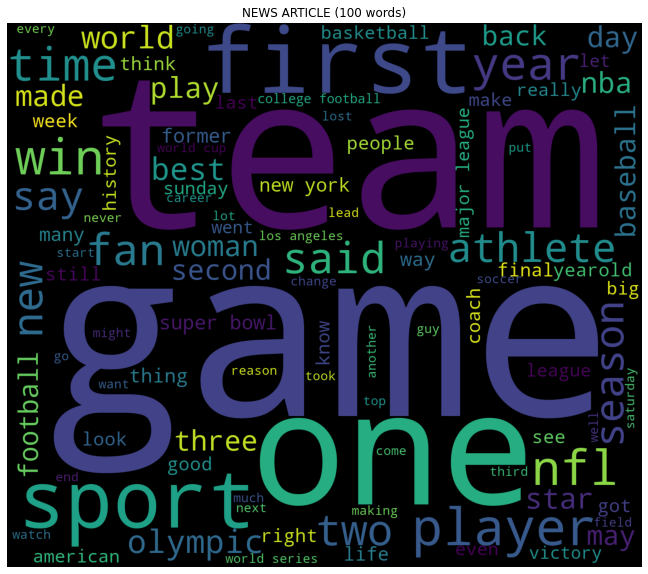

In [95]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

In [83]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y)

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=False, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words=stopwords)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [33]:
# Print the last 20 features, notice that they are made up of single words and also phrases of 2 words
features = tfidf_vectorizer.get_feature_names()[-20:]
features.sort()
features

['zouhour',
 'zoukis',
 'zuburbia',
 'zuburbia endorse',
 'zucchini',
 'zuckerberg',
 'zuckerberg brash',
 'zuckerberg joined',
 'zuckerberg make',
 'zuckerberg spoke',
 'zumba',
 'zurich',
 'zurich chess',
 'zuzana',
 'zuzana navelkova',
 'école',
 'école de',
 'öztürk',
 'öztürk université',
 'über']

In [34]:
svc_classifier = LinearSVC()

# Fit the classifier to the training data
svc_classifier.fit(tfidf_train,y_train)

# Create the predicted categories
pred = svc_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.7202


In [35]:
def predict_topic(text):
    result = svc_classifier.predict(tfidf_vectorizer.transform([text]))
    return(result[0])

In [36]:
predict_topic('laughter is the best medicine.')

'WELLNESS'

In [96]:
sentiment('Laughter is the best medicine.')

(1.0, 0.3)

In [37]:
with open('classifier.pkl', 'wb') as file:
    pickle.dump(svc_classifier, file)
    
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)